Comparing Scenario 1 and Scenario 2:
Null Hypothesis (H0): The means of Scenario 1 and Scenario 2 are equal.
Alternative Hypothesis (Ha): The means of Scenario 1 and Scenario 2 are not equal.
T-statistic (t-score): -155.4008
P-value: 0.0000
Result: Reject H0. There's a significant difference between Scenario 1 and Scenario 2.

Comparing Scenario 2 and Scenario 3:
Null Hypothesis (H0): The means of Scenario 2 and Scenario 3 are equal.
Alternative Hypothesis (Ha): The means of Scenario 2 and Scenario 3 are not equal.
T-statistic (t-score): -96.0302
P-value: 0.0000
Result: Reject H0. There's a significant difference between Scenario 2 and Scenario 3.

Comparing Scenario 1 and Scenario 3:
Null Hypothesis (H0): The means of Scenario 1 and Scenario 3 are equal.
Alternative Hypothesis (Ha): The means of Scenario 1 and Scenario 3 are not equal.
T-statistic (t-score): -203.5213
P-value: 0.0000
Result: Reject H0. There's a significant difference between Scenario 1 and Scenario 3.



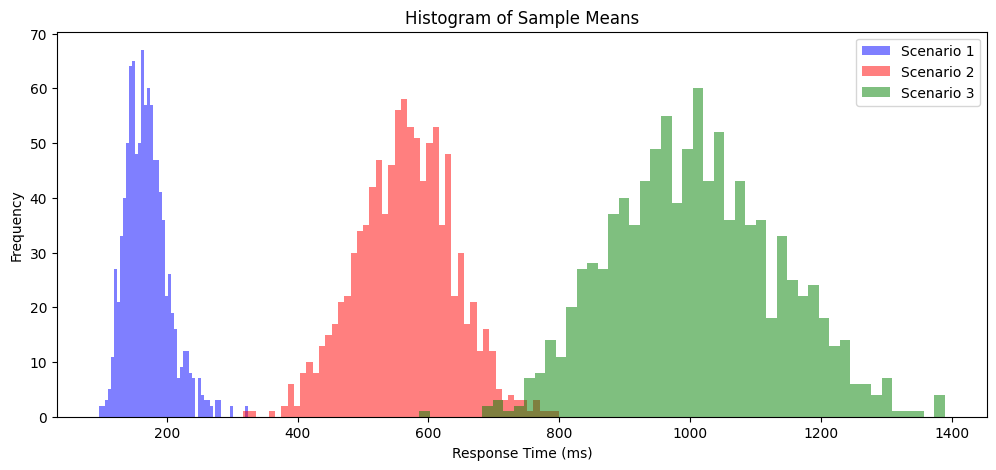

C:\Users\tmehd\AppData\Local\Temp\ipykernel_11552\67290313.py:66: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, label=f'{labels[i]}', shade=True, color=colors[i])
C:\Users\tmehd\AppData\Local\Temp\ipykernel_11552\67290313.py:66: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, label=f'{labels[i]}', shade=True, color=colors[i])
C:\Users\tmehd\AppData\Local\Temp\ipykernel_11552\67290313.py:66: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, label=f'{labels[i]}', shade=True, color=colors[i])


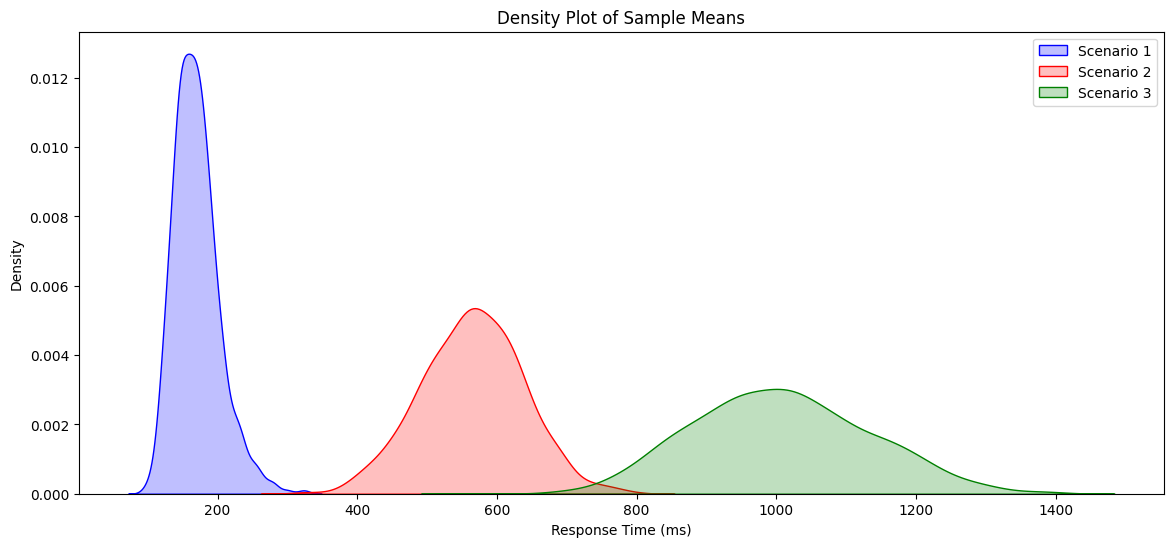

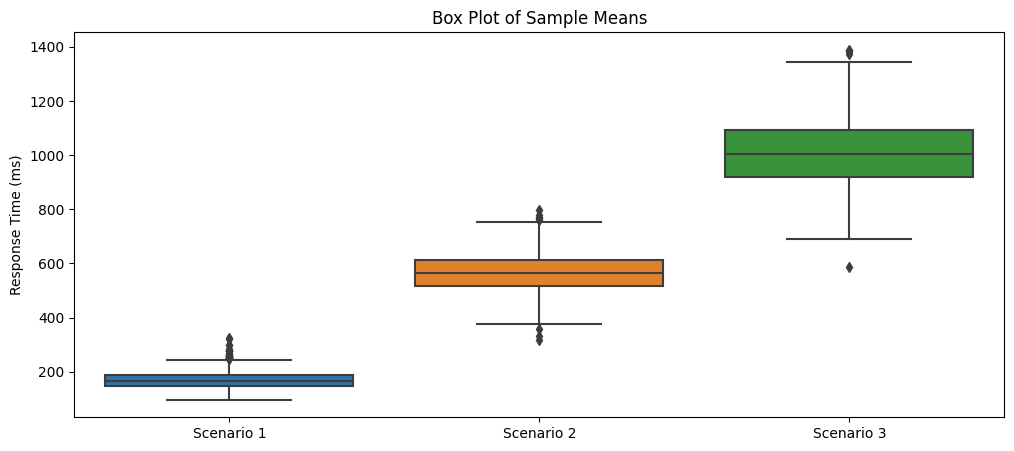

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Set the directory to where your JMeter results are stored
os.chdir("C:/Users/tmehd/OneDrive/Desktop/GuidedResearch/guidedresearchproject-tmehtiyev2019/data/Thread_Count_Effect")


def collect_sample_means(data_column, sample_size=50, num_samples=1000):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data_column, sample_size)
        sample_means.append(sample.mean())
    return sample_means

# Load data for all scenarios
data_scenario1 = pd.read_csv("View_Results_1.csv")['elapsed']
data_scenario2 = pd.read_csv("View_Results_2.csv")['elapsed']
data_scenario3 = pd.read_csv("View_Results_3.csv")['elapsed']

# Collect sample means
sample_means_scenario1 = collect_sample_means(data_scenario1)
sample_means_scenario2 = collect_sample_means(data_scenario2)
sample_means_scenario3 = collect_sample_means(data_scenario3)

def hypothesis_test(data1, data2, label1, label2):
    t_stat, p_value = stats.ttest_ind(data1, data2)
    print(f"Comparing {label1} and {label2}:")
    print(f"Null Hypothesis (H0): The means of {label1} and {label2} are equal.")
    print(f"Alternative Hypothesis (Ha): The means of {label1} and {label2} are not equal.")
    print(f"T-statistic (t-score): {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"Result: Reject H0. There's a significant difference between {label1} and {label2}.\n")
    else:
        print(f"Result: Fail to reject H0. There's no significant difference between {label1} and {label2}.\n")
    return t_stat, p_value

# Define labels and data
labels = ['Scenario 1', 'Scenario 2', 'Scenario 3']
data_list = [sample_means_scenario1, sample_means_scenario2, sample_means_scenario3]

# Conduct and print hypothesis tests
t_stat_12, p_value_12 = hypothesis_test(sample_means_scenario1, sample_means_scenario2, 'Scenario 1', 'Scenario 2')
t_stat_23, p_value_23 = hypothesis_test(sample_means_scenario2, sample_means_scenario3, 'Scenario 2', 'Scenario 3')
t_stat_13, p_value_13 = hypothesis_test(sample_means_scenario1, sample_means_scenario3, 'Scenario 1', 'Scenario 3')

# Plot Histogram
plt.figure(figsize=(12, 5))
colors = ['blue', 'red', 'green']
for i, data in enumerate(data_list):
    plt.hist(data, bins=50, alpha=0.5, label=labels[i], color=colors[i])
plt.title("Histogram of Sample Means")
plt.xlabel("Response Time (ms)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot Density Plot
plt.figure(figsize=(14, 6))
for i, data in enumerate(data_list):
    sns.kdeplot(data, label=f'{labels[i]}', shade=True, color=colors[i])
plt.title("Density Plot of Sample Means")
plt.xlabel("Response Time (ms)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plot Box Plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=data_list)
plt.xticks([0, 1, 2], labels)
plt.title("Box Plot of Sample Means")
plt.ylabel("Response Time (ms)")
plt.show()
